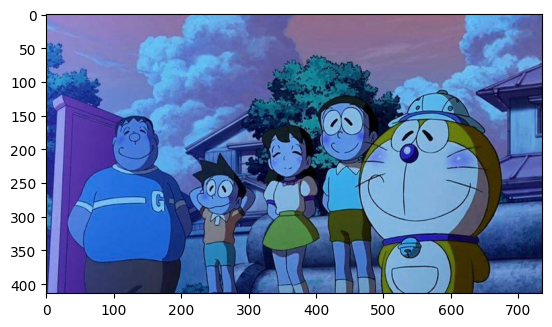

In [1]:
# Đọc ảnh từ thiết bị
# Sử dụng hàm cv2.imread(
#                 filename: str,
#                 flags:int = ...)

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('D:\HUS\Computer Vision\Lab0\doraemon2.jpg')
plt.imshow(img)


In [2]:
print(img.shape)

(414, 736, 3)


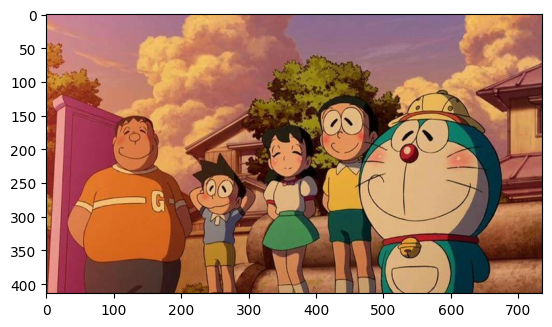

In [3]:
# Đổi kênh màu BRG thành RGB
# Sử dụng hàm cv2.cvtColor(src: Matlike,code:int)
# Hoặc
# Đảo ngược kênh màu của ảnh hiện tại

img_rgb = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
img_rgb = img[:, :, ::-1]
plt.imshow(img_rgb)

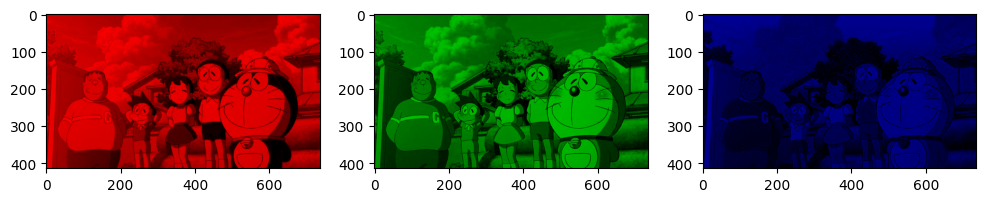

In [4]:
# Tách các kênh màu từ ảnh

red = img_rgb.copy()
green = img_rgb.copy()
blue = img_rgb.copy()

red [:, :, 1] = 0
red [:, :, 2] = 0

green [:, :, 0] = 0
green [:, :, 2] = 0

blue [:, :, 0] = 0
blue [:, :, 1] = 0

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(red)

plt.subplot(1,3,2)
plt.imshow(green)

plt.subplot(1,3,3)
plt.imshow(blue)

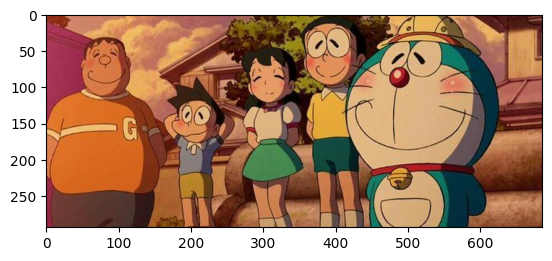

In [5]:
img_cropped = img_rgb[120:600, 50:1200]
plt.imshow(img_cropped)

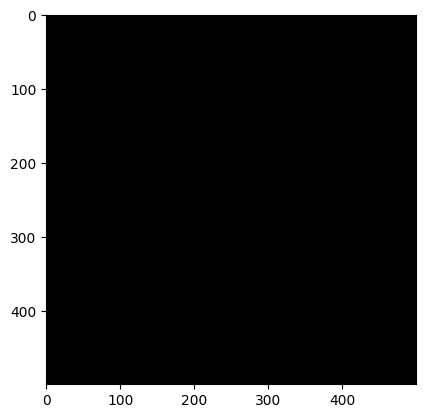

In [6]:
# Khởi tạo một ảnh màu đen có kích thước 500x500x3.
import numpy as np

img1 = np.zeros([500, 500, 3], dtype=np.uint8)
plt.imshow(img1)

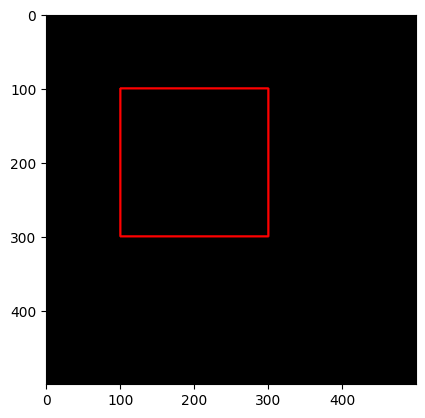

In [7]:
# Vẽ một hình vuông:
# Sử dụng hàm cv2.rectangle trong opencv:
#   Trong đó:
#       cp : ảnh đầu vào.
#       (100, 100) , (300, 300) : tọa độ điểm top-left và bottom-right.
#       (255,0,0) : mã màu của hình (RGB).
#       2 : thickness.
cp = img1.copy()
rectang = cv2.rectangle(cp, (100,100), (300,300), (255, 0, 0), 2)
plt.imshow(rectang)

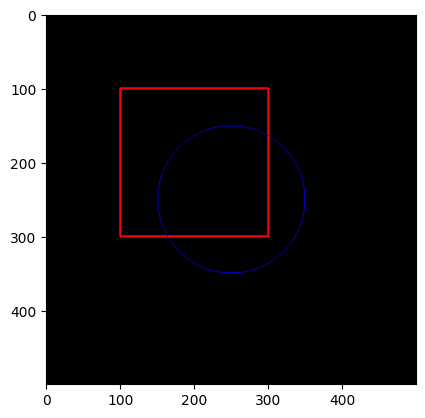

In [8]:
cir = cv2.circle(cp, (250,250), 100, (0, 0 ,255), 1)
plt.imshow(cir)

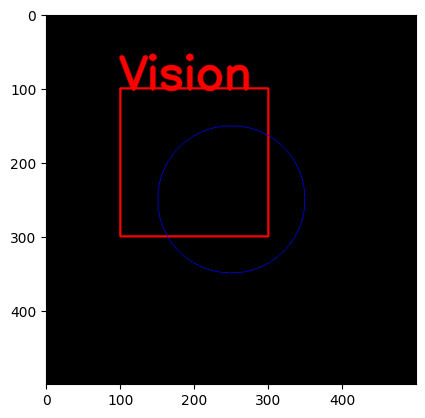

In [9]:
font = cv2.FONT_HERSHEY_SIMPLEX
new_img = cv2.putText(cp, 'Vision', (100, 100), font, 2, (255, 0, 0), 5, cv2.LINE_AA)
plt.imshow(new_img)

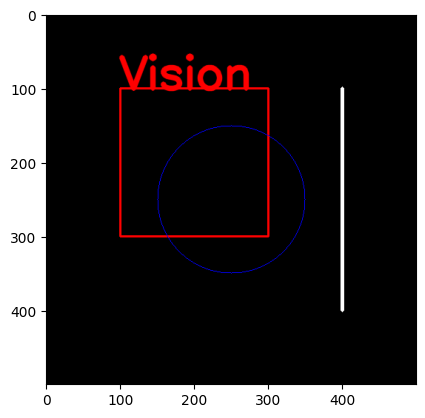

In [10]:
line = cv2.line(cp, (400, 100), (400, 400),(255, 255,255), 3)
plt.imshow(line)

[[[100 350]]

 [[300 400]]

 [[350 450]]

 [[300 480]]

 [[150 450]]

 [[100 300]]]


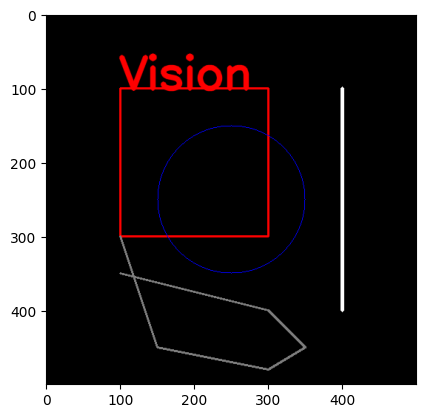

In [11]:
pts = np.array([[100, 350], [300, 400],
                [350, 450], [300, 480],
                [150, 450], [100, 300]],
                np.int32)
pts = pts.reshape((-1, 1, 2))
print(pts)

a = cv2.polylines(cp, [pts], False, (125, 125, 125), 2)
plt.imshow(a)


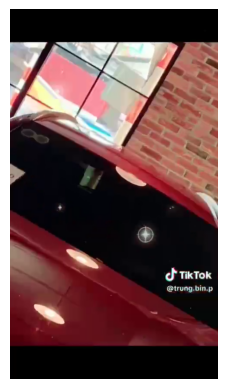

In [12]:
from IPython.display import clear_output
import time

video_path = r'D:\HUS\Computer Vision\Lab0\6922889342033.mp4'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # chuyển sang RGB để hiển thị đúng màu
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # clear ảnh cũ và hiển thị ảnh mới
    clear_output(wait=True)
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.show()

    time.sleep(0.03)  # điều chỉnh tốc độ phát (giả lập fps)

cap.release()


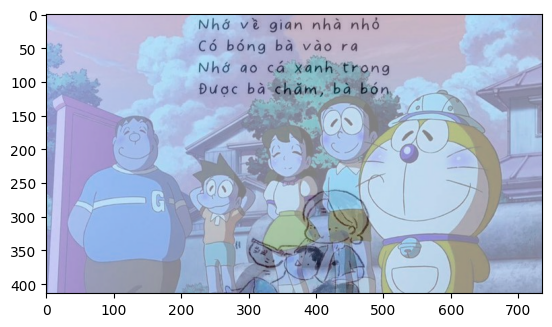

In [13]:
img2_resized = cv2.imread(r'D:\HUS\Computer Vision\Lab0\anhnen9.jpg')
img = cv2.imread(r'D:\HUS\Computer Vision\Lab0\doraemon2.jpg')
img2_resized = cv2.resize(img2_resized, (img.shape[1], img.shape[0]))
dst = cv2.addWeighted(img, 0.5, img2_resized, 0.5, 0.0)
plt.imshow(dst)

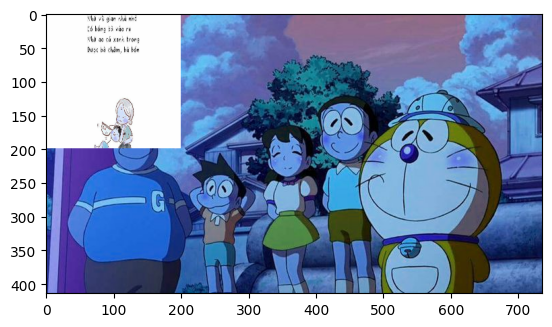

In [14]:
img2_resized = cv2.imread(r'D:\HUS\Computer Vision\Lab0\anhnen9.jpg')
img = cv2.imread(r'D:\HUS\Computer Vision\Lab0\doraemon2.jpg')
img2_resized = cv2.resize(img2_resized, (200, 200))
img[0:img2_resized.shape[0], 0:img2_resized.shape[1]] = img2_resized
plt.imshow(img)


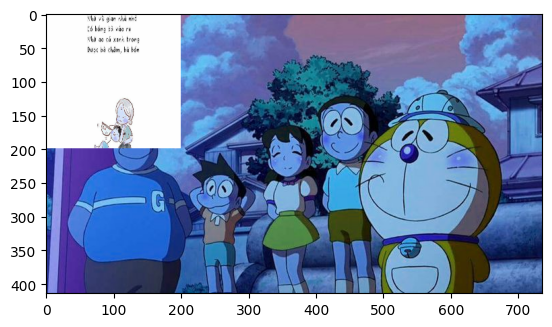

In [15]:
small_img = cv2.resize(img2_resized, (200, 200))
small_img_gray = cv2.cvtColor(src=small_img, code=cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(small_img_gray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

rows, cols, _ = small_img.shape
roi = img[0:rows, 0:cols]

background = cv2.bitwise_and(roi, roi, mask=mask_inv)
foreground = cv2.bitwise_and(small_img, small_img, mask=mask)

final = cv2.add(background, foreground)
img[0:rows, 0:cols] = final

plt.imshow( img, cmap='gray')

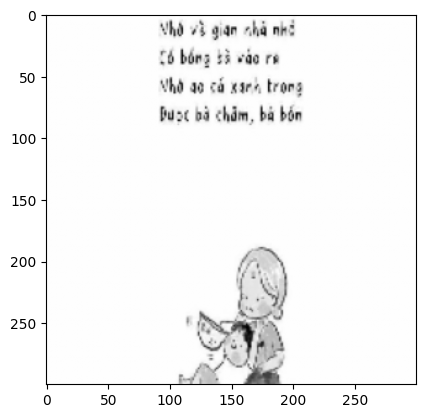

In [16]:
small_img = cv2.resize(img2_resized, (300, 300))

# Chuyển sang grayscale
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY)

# Hiển thị bằng matplotlib (dùng cmap='gray' để hiện đúng màu xám)
plt.imshow(small_img_gray, cmap="gray")
plt.show()


In [17]:
def scaling_nearest(image: np.ndarray, scale: float) -> np.ndarray:
    h, w = image.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    if image.ndim == 3:   # ảnh màu
        new_image = np.zeros((new_h, new_w, image.shape[2]), dtype=image.dtype)
    else:                 # ảnh xám
        new_image = np.zeros((new_h, new_w), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            orig_x = int(round(i / scale))
            orig_y = int(round(j / scale))
            
            orig_x = min(orig_x, h - 1)
            orig_y = min(orig_y, w - 1)
            
            new_image[i, j] = image[orig_x, orig_y]
    
    return new_image



(400, 400, 3)
(200, 200, 3)


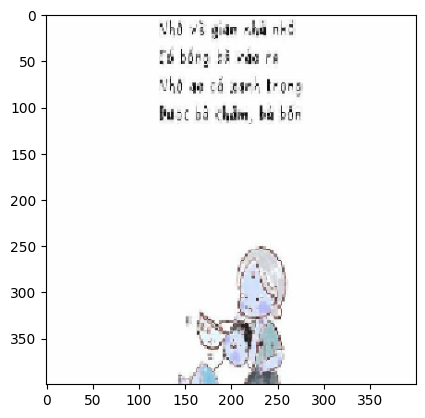

In [18]:
new_immage = scaling_nearest(image=img2_resized, scale=2.0)
plt.imshow(new_immage)
print(new_immage.shape)
print(img2_resized.shape)



In [19]:
img1 = cv2.imread("D:\HUS\Computer Vision\Lab0\doraemon2.jpg", cv2.IMREAD_GRAYSCALE)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

def get_intensity_coordinates(img1 : np.ndarray) -> tuple :
    a, b = img1.shape
    c, d = np.meshgrid(np.arange(a), np.arange(b), indexing='ij')
    coordinates = np.stack([d.ravel()/b, c.ravel()/a], axis=1)
    intensity = img1.ravel()
    return coordinates, intensity

def train_knn_model(coordinates, intensity, n_neighbor = 1):
    model = KNeighborsRegressor(n_neighbors=n_neighbor)
    model.fit(coordinates, intensity)
    return model
def resize_with_knn(img1, new_size=(200, 200), n_neighbor=1):
    a, b = new_size
    coordinates, intensity = get_intensity_coordinates(img1)
    model = train_knn_model(coordinates, intensity, n_neighbor)

    c_new, d_new = np.meshgrid(np.arange(a), np.arange(b), indexing='ij')
    new_coords = np.stack([d_new.ravel()/b, c_new.ravel()/a], axis=1)

    new_intensity = model.predict(new_coords)
    new_img1 = new_intensity.reshape(a, b).astype(np.uint8)
    
    return new_img1

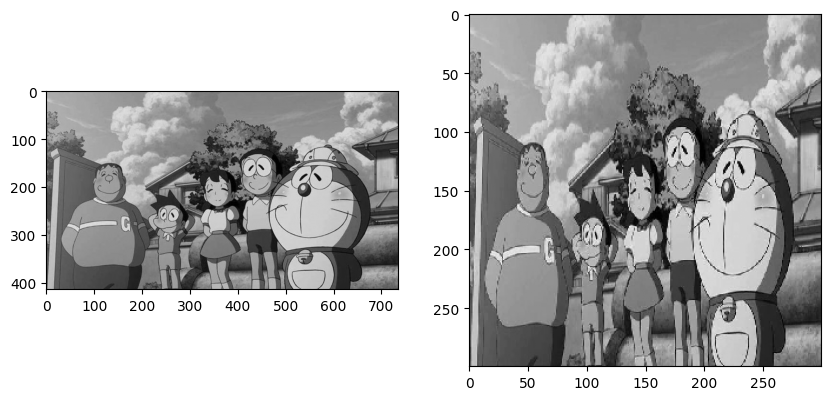

In [21]:
resized = resize_with_knn(img1, new_size=(300,300), n_neighbor=1)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(resized , cmap='gray')
plt.show()

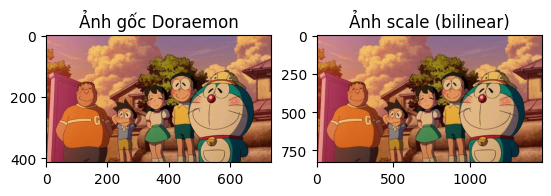

In [ ]:
def scaling_bilinear_color(image: np.ndarray, scale: float) -> np.ndarray:
    h, w, c = image.shape
    new_h, new_w = int(h * scale), int(w * scale)
    new_image = np.zeros((new_h, new_w, c), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            # Tọa độ trong ảnh gốc
            x = i / scale
            y = j / scale

            x0 = int(np.floor(x))
            y0 = int(np.floor(y))
            x1 = min(x0 + 1, h - 1)
            y1 = min(y0 + 1, w - 1)

            dx = x - x0
            dy = y - y0

            for k in range(c): 
                f00 = image[x0, y0, k]
                f01 = image[x0, y1, k]
                f10 = image[x1, y0, k]
                f11 = image[x1, y1, k]

                new_image[i, j, k] = int(
                    f00 * (1 - dx) * (1 - dy) +
                    f01 * (1 - dx) * dy +
                    f10 * dx * (1 - dy) +
                    f11 * dx * dy
                )
    return new_image

image = cv2.imread(r"D:\HUS\Computer Vision\Lab0\doraemon2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Scale ảnh
scale_factor = 2
scaled_img = scaling_bilinear_color(image, scale_factor)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Ảnh gốc Doraemon")

plt.subplot(1,2,2)
plt.imshow(scaled_img)
plt.title("Ảnh scale (bilinear)")

plt.show()


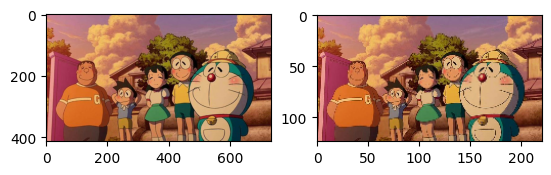

In [30]:
image_resized = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(image_resized)

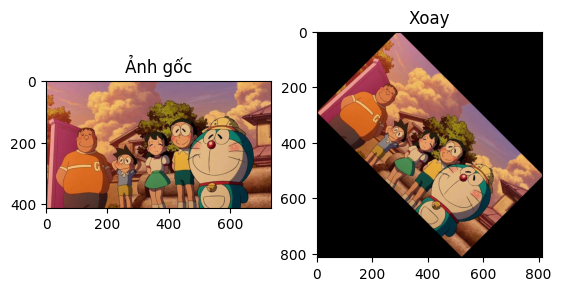

In [31]:
import math
def rotate_nearest_neighbor(image : np.ndarray, angle : float) -> np.ndarray:
    theta = math.radians(angle)
    h, w = image.shape[:2]

    # Kích thước mới (bounding box sau xoay)
    new_w = int(abs(w * math.cos(theta)) + abs(h * math.sin(theta)))
    new_h = int(abs(h * math.cos(theta)) + abs(w * math.sin(theta)))
    rotated = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    # Tâm ảnh gốc và tâm ảnh mới
    cx, cy = w // 2, h // 2
    ncx, ncy = new_w // 2, new_h // 2

    for y in range(new_h):
        for x in range(new_w):
            # Đưa về tọa độ tương đối so với tâm ảnh mới
            xt = x - ncx
            yt = y - ncy

            # Áp dụng công thức trong ảnh (đảo chiều để tìm nguồn)
            w_src = int(xt * math.cos(theta) + yt * math.sin(theta) + cx)
            v_src = int(-xt * math.sin(theta) + yt * math.cos(theta) + cy)

            # Nearest Neighbor
            if 0 <= w_src < w and 0 <= v_src < h:
                rotated[y, x] = image[v_src, w_src]

    return rotated


rotated = rotate_nearest_neighbor(image, 45)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(rotated)
plt.title("Xoay")
plt.show()